In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np



In [ ]:
X,y= make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [ ]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [ ]:
y

array([2, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2,
       0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1,

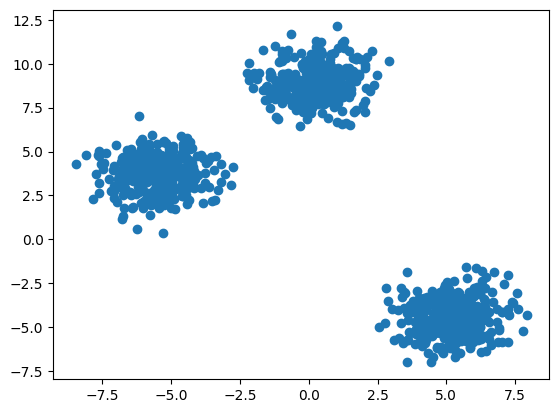

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)


In [ ]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1181.4952002962864,
 1049.1161840467157,
 853.7528135404277,
 765.6313905704704,
 667.8659405995579,
 635.9314881721616,
 551.5794716756116]

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

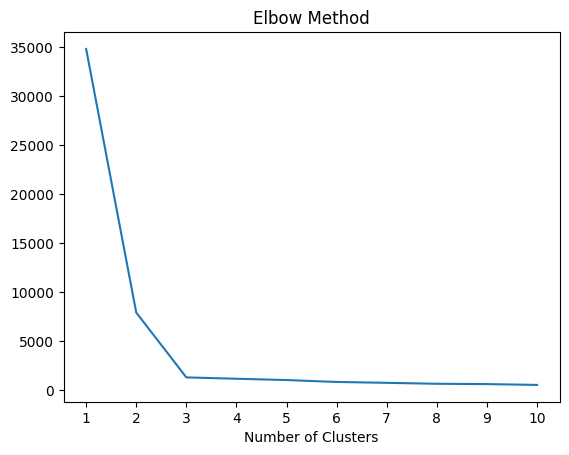

In [ ]:
plt.plot(range(1,11),wcss)
plt.xticks(np.arange(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylable("WCSS")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [ ]:
y_labels=kmeans.fit_predict(X_train)

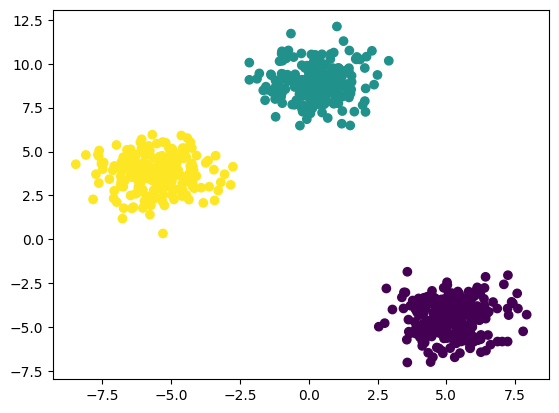

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

np.int64(3)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X_train,y_labels)

np.float64(0.8071181203797672)

In [ ]:
silhouette_cofficient=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    y_labels=kmeans.fit_predict(X_train)
    silhouette_cofficient.append(silhouette_score(X_train,y_labels))

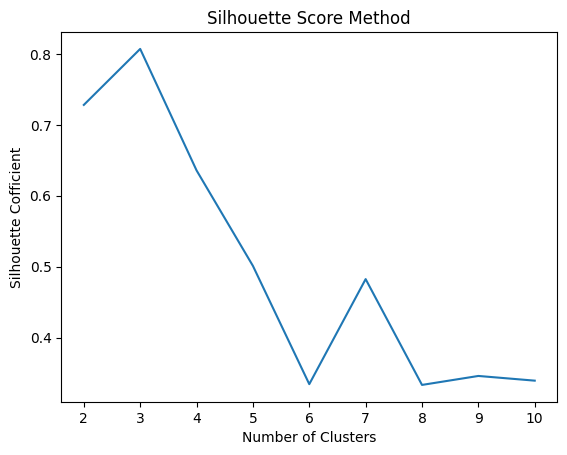

In [ ]:
plt.plot(range(2,11),silhouette_cofficient)
plt.xticks(range(2,11))
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel("Silhouette Cofficient")
plt.show()